In [105]:
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [106]:
df = pd.read_csv('train.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [107]:
X = df[['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37']]

In [108]:
X.shape

(137, 37)

In [109]:
Y = df[['revenue']]

In [110]:
le = LabelEncoder()

In [111]:
ty = df[['Type']]
city = df[['City']]
#c_group = df[['City Group']]

In [112]:
type_le = le.fit_transform(ty)
city_le = le.fit_transform(city)
#cg_le = le.fit_transform(c_group)

In [113]:
type_le = type_le.reshape(-1,1)
city_le = city_le.reshape(-1,1)
#cg_le = cg_le.reshape(-1,1)

In [114]:
type_le.shape

(137, 1)

In [115]:
type_le = pd.DataFrame(type_le)
#city_le = pd.DataFrame(city_le)
cg_le = pd.DataFrame(cg_le)

In [116]:
X = pd.concat([cg_le,type_le,X],axis=1)

In [117]:
X.shape 

(137, 39)

In [118]:
model = LinearRegression()

In [119]:
model.fit(X,Y)

LinearRegression()

In [120]:
model.coef_

array([[ -293845.64106635,  -537860.42408446,   244014.07029599,
          254299.93340671,   -75971.62377006,  -258529.51500147,
            5961.05383806,   374733.17470551,    21016.02908029,
        -1273881.10818579,  1391629.0507052 ,    19203.85712489,
         -230912.52409458,  -253252.89601353,  -908308.7443241 ,
         -281264.37017513,     9820.67423173,  -576289.86570393,
          478395.55321227,   441553.64086224,   -63142.08867874,
         -354258.40192022,   163945.0286454 ,  -252890.67390506,
          132283.90920648,   477992.4933784 ,   390773.2303452 ,
        -1067728.46083699,   115520.54759412,   524219.35795543,
          -48452.74394275,    56631.5187652 ,    59254.54209837,
         -224095.25529766,  -223987.87859204,   157756.67202776,
         -179559.76287311,   328077.74729488,   239161.83938973]])

In [121]:
model.intercept_

array([9025037.75748155])

In [122]:
pred = model.predict([['0','2','4','5','3','5','2','2','5','4','4','5','4','4','5','0','0','0','0','0','2','1','1','1','1','0','0','0','0','3','3','0','0','0','0','0','0','0','0']])

In [131]:
acc = (pred/6363241)*100

In [132]:
acc

array([[72.6309155]])

In [133]:
X.corr()

,0,0,P1,P2,P3,P4,P5,P6,P7,P8,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1.000000,-0.098585,-0.258556,-0.421095,-0.082172,-0.174134,0.019195,-0.416644,-0.193106,-0.071993,...,-0.298842,0.035497,-0.123097,-0.204542,-0.169750,-0.106115,-0.117024,-0.127973,-0.136617,-0.089976
0,-0.098585,1.000000,0.198231,0.150700,0.247365,0.057078,0.006765,0.127271,0.212908,0.123399,...,0.111218,0.094343,0.539807,0.599333,0.524885,0.700818,0.520788,0.641135,0.574185,0.634963
P1,-0.258556,0.198231,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,...,0.843738,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601
P2,-0.421095,0.150700,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,...,0.732712,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162
P3,-0.082172,0.247365,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,...,0.643420,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065
P4,-0.174134,0.057078,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,...,0.641971,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916
P5,0.019195,0.006765,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,...,0.323253,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548
P6,-0.416644,0.127271,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,...,0.729083,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594
P7,-0.193106,0.212908,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,...,0.739868,0.584071,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678
P8,-0.071993,0.123399,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,...,0.630284,0.754736,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294


In [134]:
pred

array([[4621680.19405752]])

<AxesSubplot:>

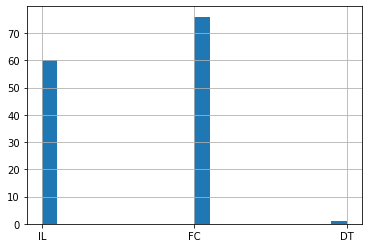

In [135]:
df['Type'].hist(bins=20)

<AxesSubplot:>

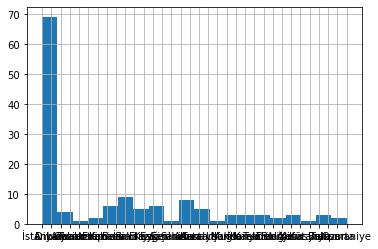

In [136]:
df['City'].hist(bins=20)

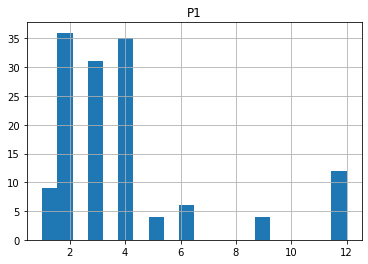

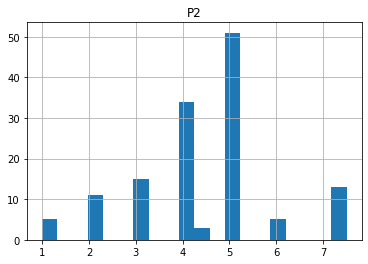

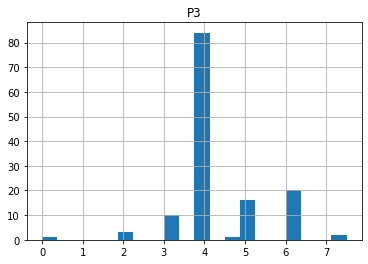

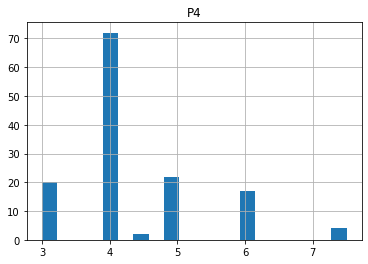

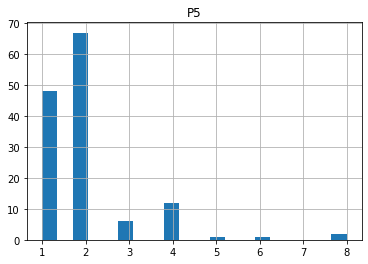

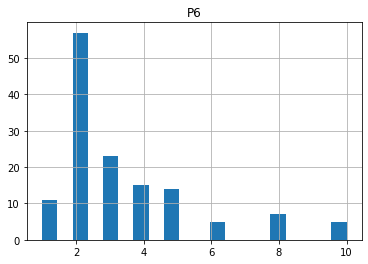

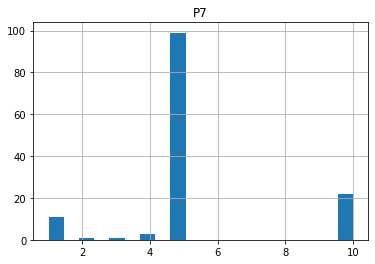

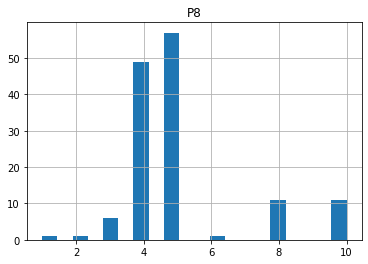

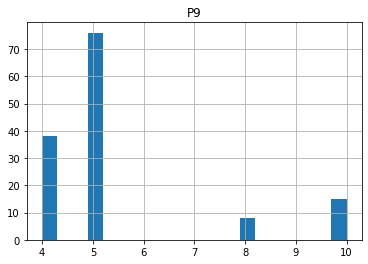

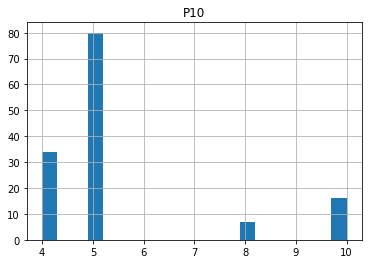

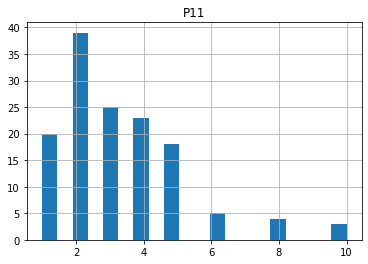

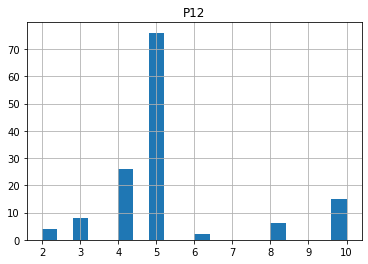

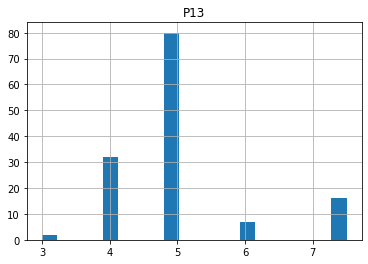

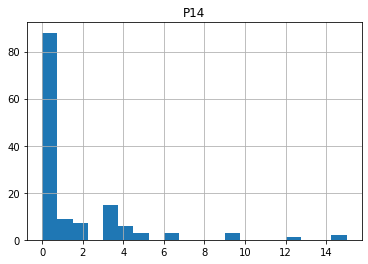

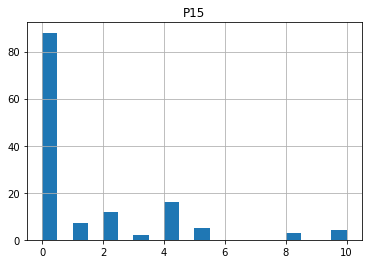

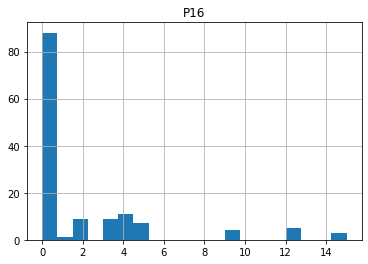

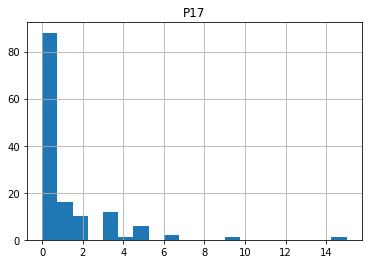

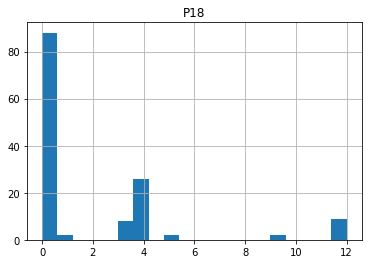

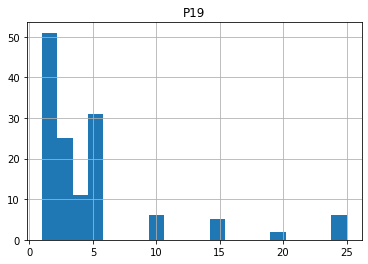

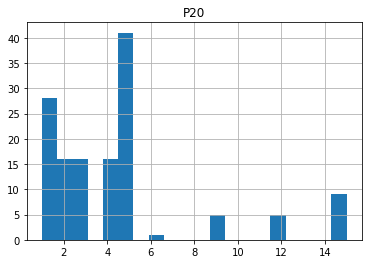

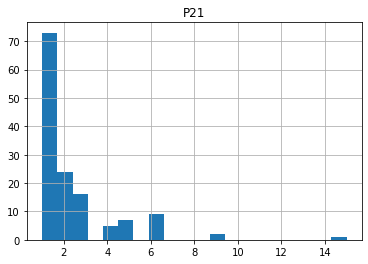

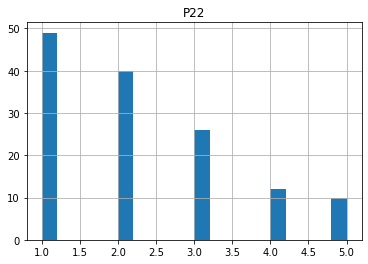

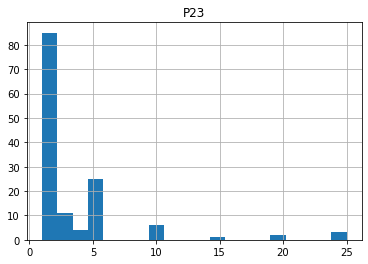

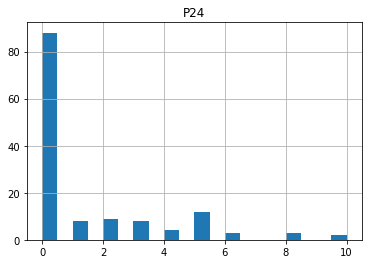

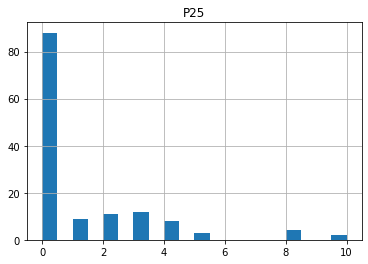

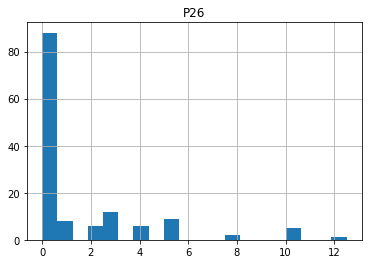

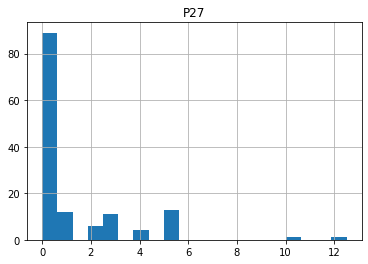

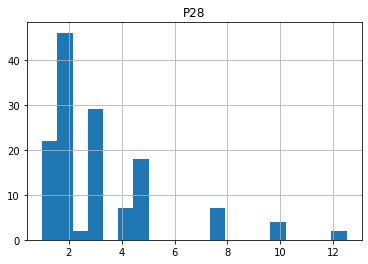

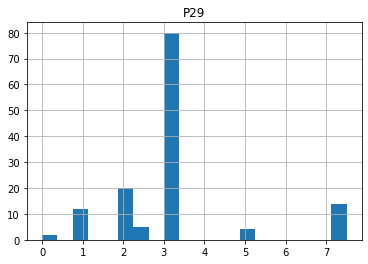

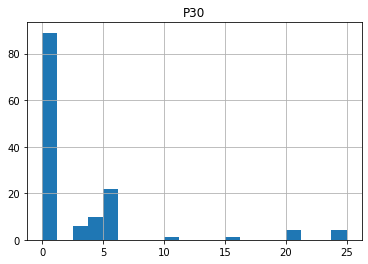

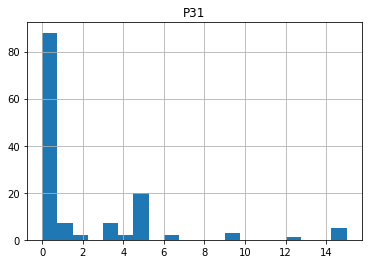

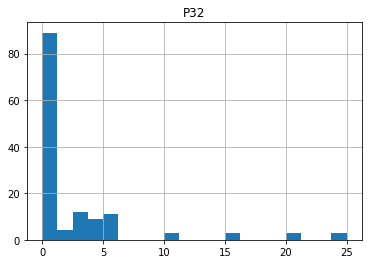

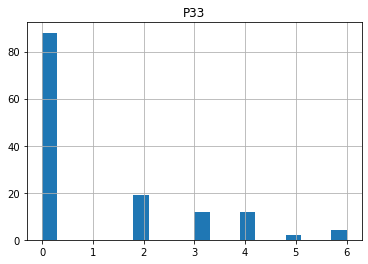

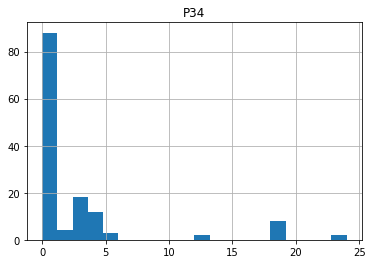

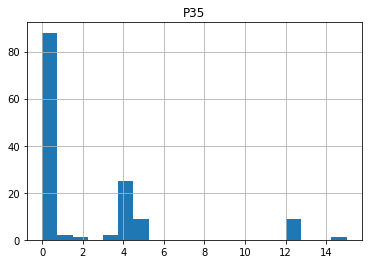

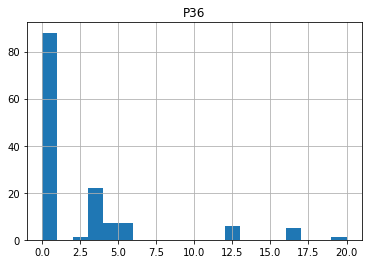

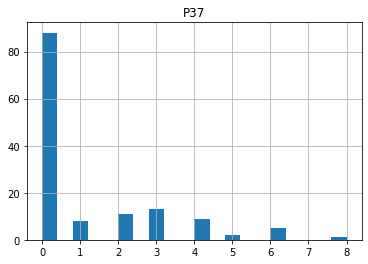

In [137]:
for i in df.columns[5:-1]:
    df[i].hist(bins=20)
    plt.title(i)
    plt.show()

<AxesSubplot:>

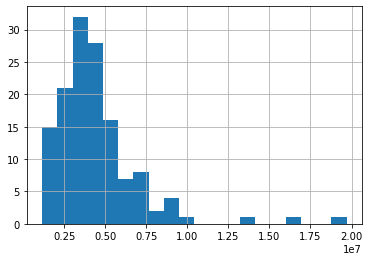

In [138]:
df['revenue'].hist(bins=20)

<AxesSubplot:>

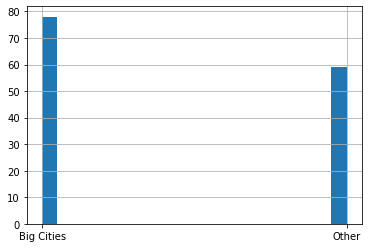

In [139]:
df['City Group'].hist(bins=20)

# GUI

In [140]:
import tkinter as tk

In [142]:
app = tk.Tk()
app.title('Revenue Predictor')
app.geometry('450x350')
app.configure(bg='blue')





 = tk.Variable(app)
house_age = tk.Variable(app)
rooms = tk.Variable(app)
population= tk.Variable(app)



tk.Label(app, text='Price Predictor',fg='white',bg='black',font=('Times New Roman', 25, 'bold')).place(x=120,y=10)

tk.Label(app, text='Income',font=('Roboto Slab', 10, 'bold')).place(x=20,y=65)
tk.Label(app, text='House Age',font=('Roboto Slab', 10, 'bold')).place(x=20,y=115)
tk.Label(app, text='Number of rooms',font=('Roboto Slab', 10, 'bold')).place(x=20,y=165)
tk.Label(app, text='Population',font=('Roboto Slab', 10, 'bold')).place(x=20,y=215)



tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=income).place(x=150,y=65)
tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=house_age).place(x=150,y=115)
tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=rooms).place(x=150,y=165)
tk.Entry(app,width=30,bg='#f5ffff',font=('Roboto Slab', 10),textvariable=population).place(x=150,y=215)

def values():
    
    i=income.get()
    h=house_age.get()
    r=rooms.get()
    p=population.get()
    
    income.set('')
    house_age.set('')
    rooms.set('')
    population.set('')
    
    query=pd.DataFrame({'Avg. Area Income':[i],'Avg. Area House Age':[h],'Avg. Area Number of Rooms':[r],'Area Population':[p]})

    values_var=tk.Variable(app)

    values_var.set('%.1f$'%(model.predict(query)[0]))

    values=tk.Label(app, text='Price can be :',bg='yellow',font=('Roboto Slab', 10, 'bold')).place(x=40,y=315)
    
    values=tk.Label(app, text='Price can be :',textvariable=values_var,bg='yellow',font=('Roboto Slab', 10, 'bold')).place(x=130,y=315)

    
tk.Button(app, text='  Predict  ',bg='red',foreground='white',font=('Roboto Slab', 12, 'bold'),command=values).place(x=150,y=265)


app.mainloop()